In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r"D:\Supervised Machine Learning lab (SMLL)\2\Assignment 2 Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [2]:
dataset = df.iloc[: ,1:]
print(dataset)

        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]


In [3]:
dataset.shape

(200, 4)

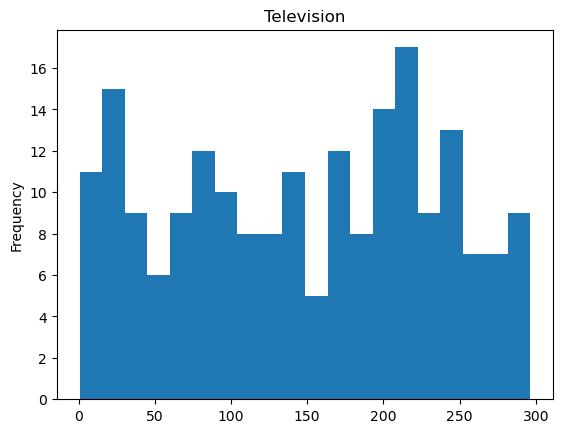

In [4]:
# fig, ax = plt.subplots(figsize=(10, 20))  # Corrected figure creation
dataset['TV'].plot(kind='hist', bins=20, title='Television')
plt.show()

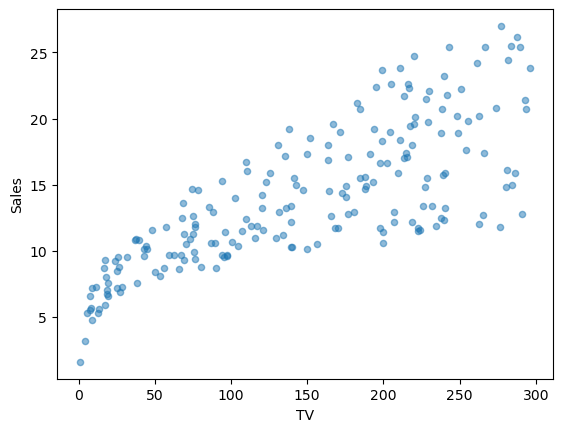

In [5]:
dataset.plot(kind='scatter',x='TV',y='Sales', alpha=0.5)
plt.show()

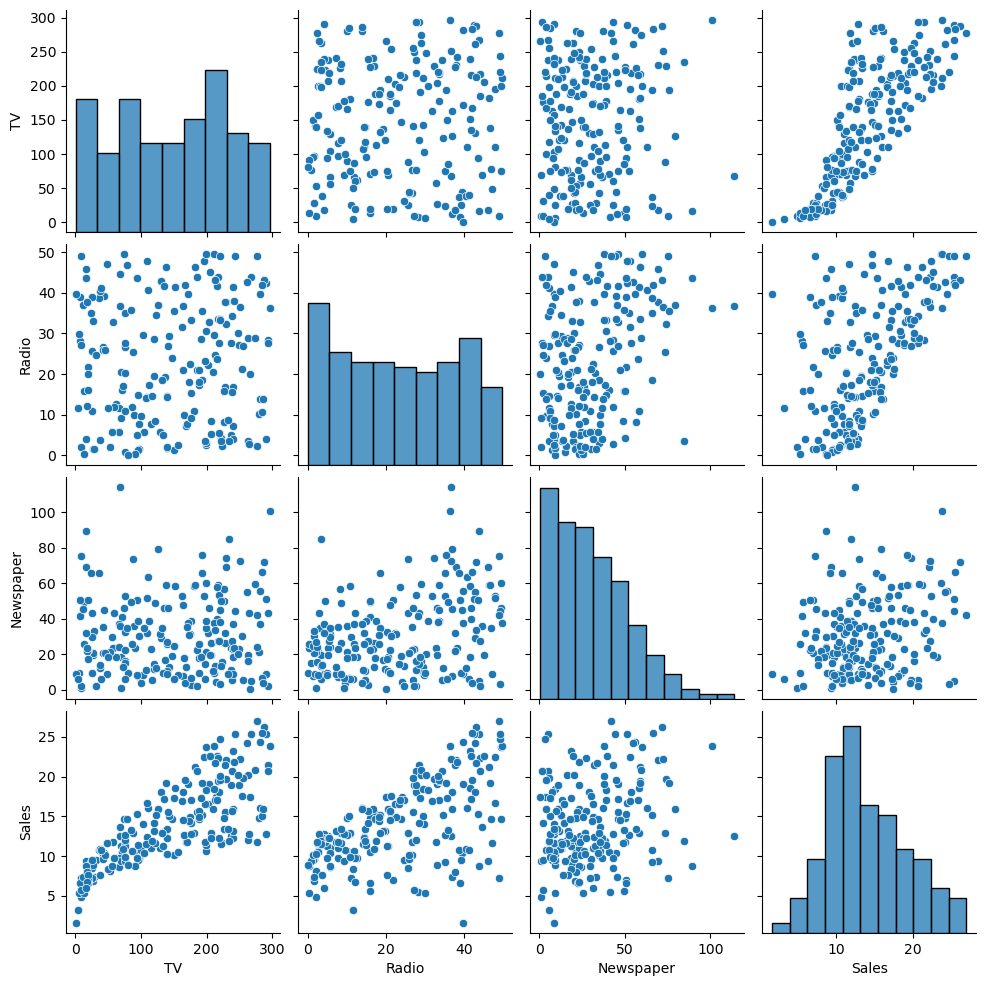

In [6]:
sns.pairplot(data=dataset)

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

def calc_vif(X):
    """
    Calculate Variance Inflation Factor (VIF) for a given DataFrame of features.

    Parameters:
    X: DataFrame
        A DataFrame containing the independent variables.

    Returns:
    DataFrame
        A DataFrame with features and their corresponding VIF values.
    """
    vif = pd.DataFrame()
    vif["features"] = X.columns  # Add column names
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]  # Calculate VIF for all columns
    return vif


In [8]:
X_NEW = dataset.iloc[: ,:-1]
calc_vif(X_NEW)

,features,VIF
0,TV,2.486772
1,Radio,3.285462
2,Newspaper,3.055245


In [9]:
x = dataset[["TV", 'Radio', 'Newspaper']]
y = dataset['Sales']

In [10]:
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [11]:
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined (e.g., as NumPy arrays or pandas DataFrames/Series)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [12]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()

In [13]:
mlr.fit(X_train,y_train)

LinearRegression()

In [14]:
y_pred = mlr.predict(X_test)
print(y_pred)

[16.4080242  20.88988209 21.55384318 10.60850256 22.11237326 13.10559172
 21.05719192  7.46101034 13.60634581 15.15506967  9.04831992  6.65328312
 14.34554487  8.90349333  9.68959028 12.16494386  8.73628397 16.26507258
 10.27759582 18.83109103 19.56036653 13.25103464 12.33620695 21.30695132
  7.82740305  5.80957448 20.75753231 11.98138077  9.18349576  8.5066991
 12.46646769 10.00337695 21.3876709  12.24966368 18.26661538 20.13766267
 14.05514005 20.85411186 11.0174441   4.56899622]


In [15]:
# Actual vs Predictied value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value' : y_pred})
print(mlr_diff)

     Actual value  Predicted value
95           16.9        16.408024
15           22.4        20.889882
30           21.4        21.553843
158           7.3        10.608503
128          24.7        22.112373
115          12.6        13.105592
69           22.3        21.057192
170           8.4         7.461010
174          11.5        13.606346
45           14.9        15.155070
66            9.5         9.048320
182           8.7         6.653283
165          11.9        14.345545
78            5.3         8.903493
186          10.3         9.689590
177          11.7        12.164944
56            5.5         8.736284
152          16.6        16.265073
82           11.3        10.277596
68           18.9        18.831091
124          19.7        19.560367
16           12.5        13.251035
148          10.9        12.336207
93           22.2        21.306951
65            9.3         7.827403
60            8.1         5.809574
84           21.7        20.757532
67           13.4   

In [16]:
# Errors
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Mean Square Error
mean_square_error = mean_squared_error(y_test,y_pred)
print(f"Mean Square Error is : {mean_square_error}")
# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error is : {mae}")
# Root Mean Square Error
root_mean_square_error = np.sqrt(mean_square_error)
print(f"Root Mean Square Error is : {root_mean_square_error}")
# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R2 score is : {r2*100}")
#intecept
X_intercept = mlr.intercept_
print(f"X intercept is : {X_intercept}")
Y_intercept = mlr.coef_
print(f"Y intercept is : {Y_intercept}")

Mean Square Error is : 3.1740973539761015
Mean Absolute Error is : 1.4607567168117597
Root Mean Square Error is : 1.7815996615334495
R2 score is : 89.94380241009121
X intercept is : 2.979067338122631
Y intercept is : [0.04472952 0.18919505 0.00276111]


In [17]:
# Function to scatter plot with regression line
def plot_scatter_with_regression(ax,x_data,y_data,x_label,y_label,title):
    ax.scatter(x_data,y_data,alpha=0.5)

    # Calculate regression line
    slope, intercept = np.polyfit(x_data,y_data,1)
    regression_line = slope*x_data + intercept

    ax.plot(x_data,regression_line, color='red', label='Regression_Line')

    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.legend()



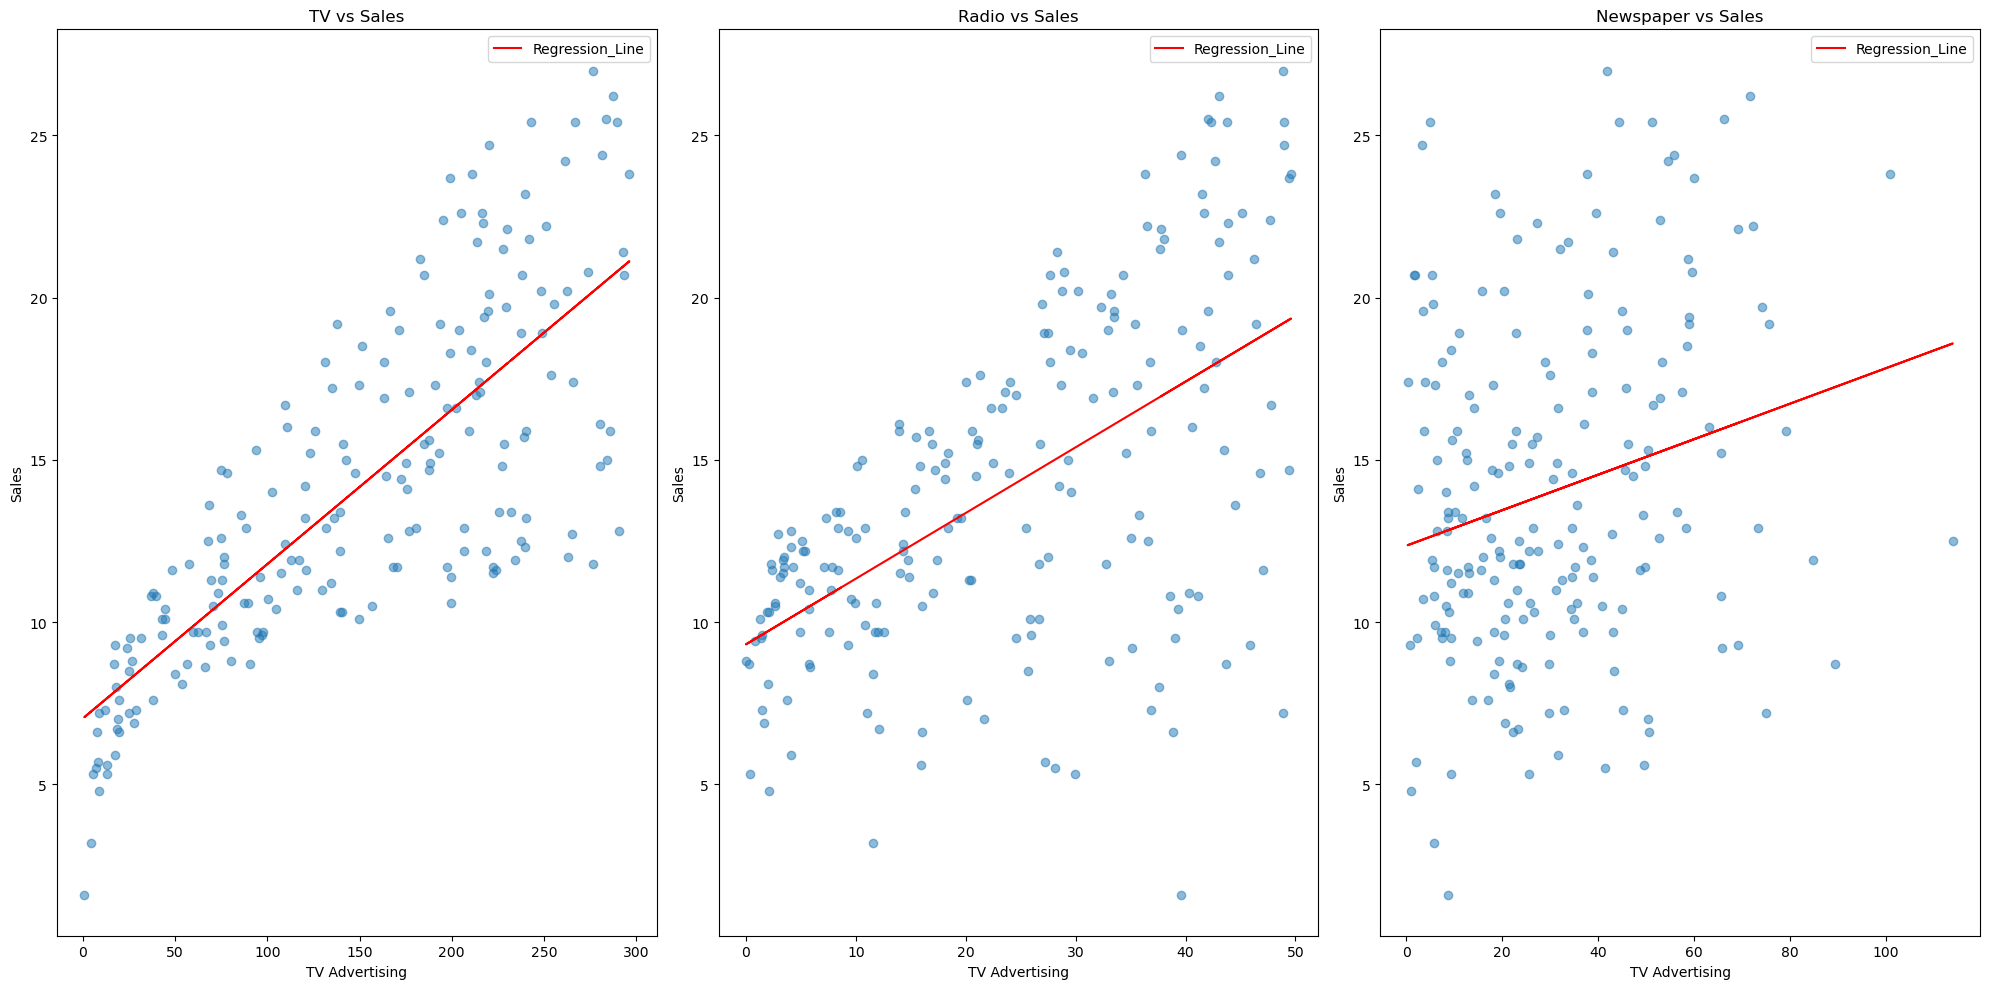

In [77]:
fig , ax = plt.subplots(1,3, figsize=(20,10))

# Scatter plot for TV vs Sales
plot_scatter_with_regression(ax[0],dataset['TV'],dataset['Sales'],'TV Advertising','Sales','TV vs Sales')
plot_scatter_with_regression(ax[1],dataset['Radio'],dataset['Sales'],'TV Advertising','Sales','Radio vs Sales')
plot_scatter_with_regression(ax[2],dataset['Newspaper'],dataset['Sales'],'TV Advertising','Sales','Newspaper vs Sales')
plt.tight_layout()
plt.show()

# Practice Datasets

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r"C:\Users\Neil\Supervised Machine Learining Lab (SMLL)\Practice dataset 1 Product performance.csv")
df.head()

,Ambience,Customer_service,Offers,Product_range,Performance
0,0.50,1.40,-0.68,0.48,2
1,-0.14,0.92,-0.14,0.11,7
2,0.65,0.06,-0.79,0.51,5
3,1.52,-0.65,-0.31,1.12,9
4,-0.23,0.70,-1.89,1.10,8


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Ambience          1000 non-null   float64
 1   Customer_service  1000 non-null   float64
 2   Offers            1000 non-null   float64
 3   Product_range     1000 non-null   float64
 4   Performance       1000 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 39.2 KB


In [22]:
df.isnull()

,Ambience,Customer_service,Offers,Product_range,Performance
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
995,False,False,False,False,False
996,False,False,False,False,False
997,False,False,False,False,False
998,False,False,False,False,False


In [23]:
df.isna().sum()

Ambience            0
Customer_service    0
Offers              0
Product_range       0
Performance         0
dtype: int64

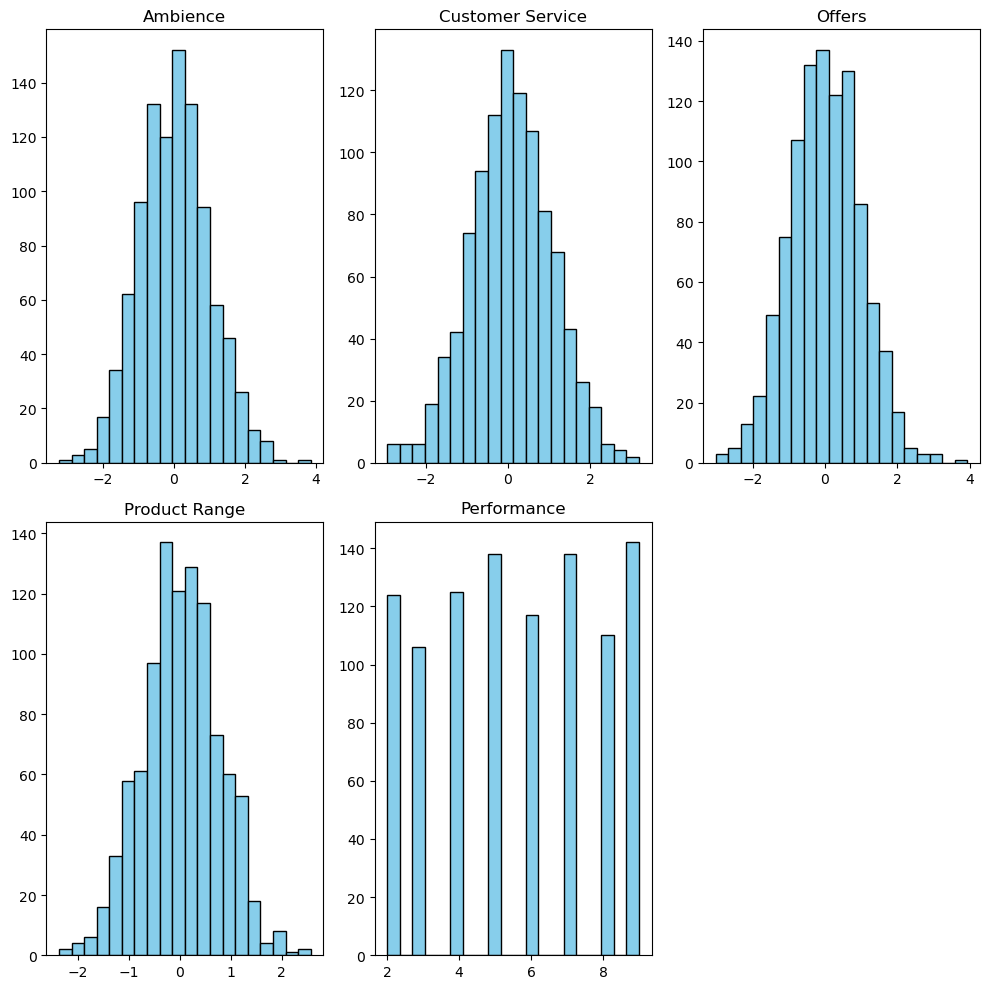

In [24]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' and columns like 'Ambience', 'Customer_service', etc.

# Create subplots
fig, ax = plt.subplots(2, 3, figsize=(10, 10))

# Plotting histograms for each column
ax[0, 0].hist(df['Ambience'], bins=20, color='skyblue', edgecolor='black')
ax[0, 0].set_title('Ambience')

ax[0, 1].hist(df['Customer_service'], bins=20, color='skyblue', edgecolor='black')
ax[0, 1].set_title('Customer Service')

ax[0, 2].hist(df['Offers'], bins=20, color='skyblue', edgecolor='black')
ax[0, 2].set_title('Offers')

ax[1, 0].hist(df['Product_range'], bins=20, color='skyblue', edgecolor='black')
ax[1, 0].set_title('Product Range')

ax[1, 1].hist(df['Performance'], bins=20, color='skyblue', edgecolor='black')
ax[1, 1].set_title('Performance')

# If there are no more subplots to plot on the bottom row, we can hide the last subplot
ax[1, 2].axis('off')

# Adjust layout to avoid overlapping
plt.tight_layout()

# Show the plot
plt.show()


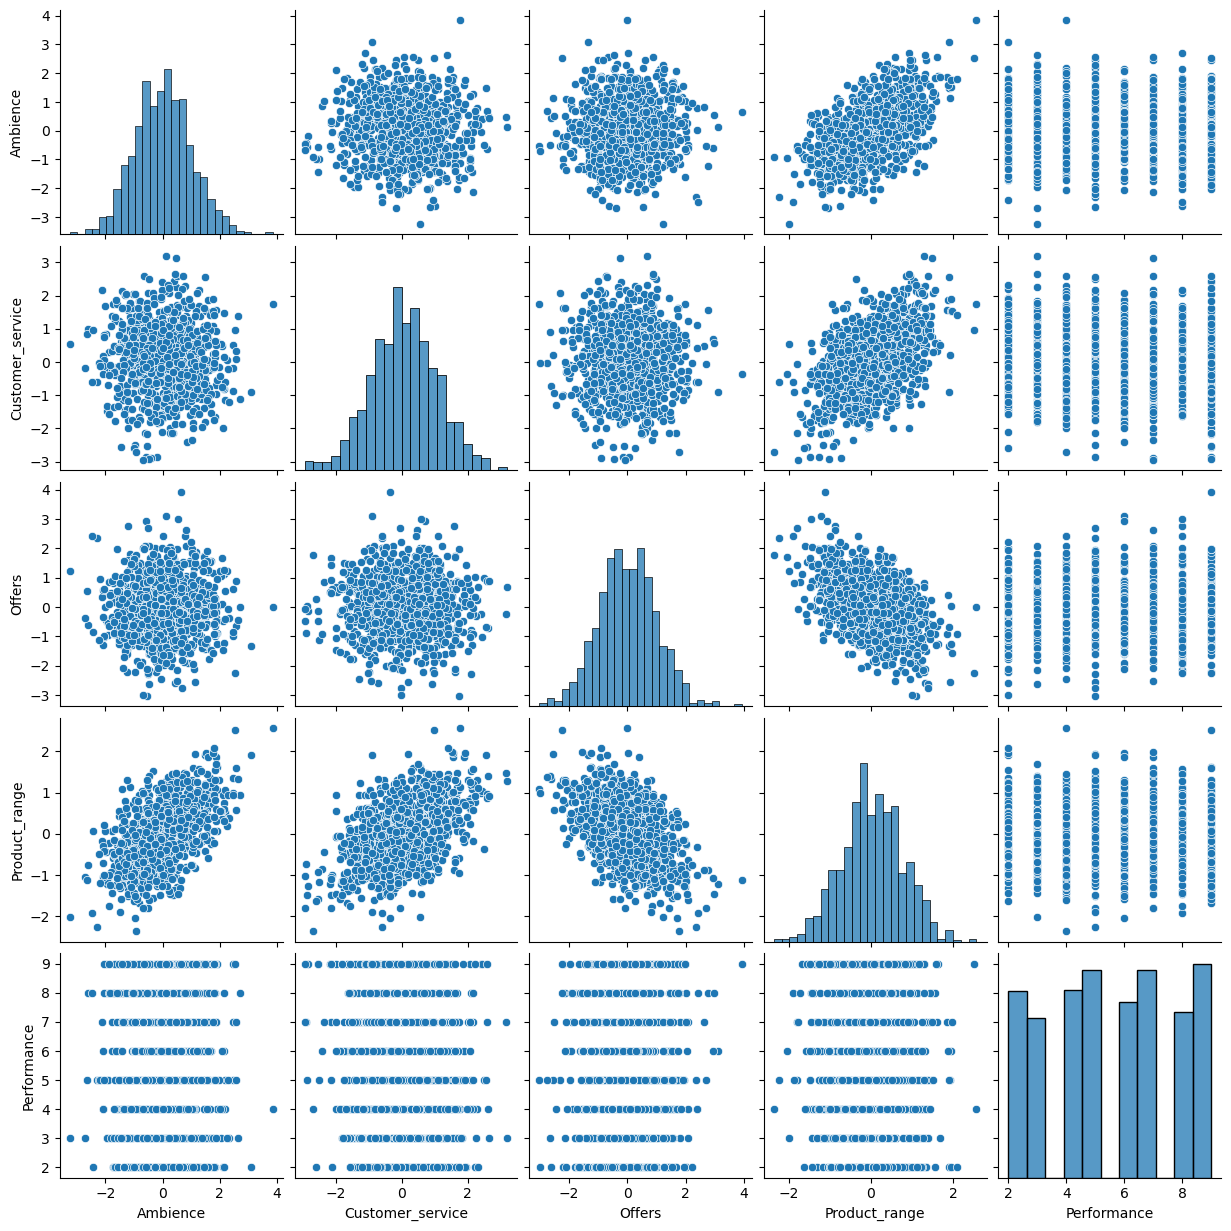

In [25]:
import seaborn as sns
sns.pairplot(df[['Ambience', 'Customer_service', 'Offers', 'Product_range', 'Performance']])


In [26]:
X = df[['Ambience', 'Customer_service', 'Offers', 'Product_range']]
y = df['Performance']

In [27]:
calc_vif(X)

,features,VIF
0,Ambience,3.007233
1,Customer_service,2.548359
2,Offers,2.581965
3,Product_range,5.950350


In [28]:
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined (e.g., as NumPy arrays or pandas DataFrames/Series)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()

In [30]:
mlr.fit(X_train,y_train)

LinearRegression()

In [31]:
y_pred = mlr.predict(X_test)
print(y_pred)

[5.73984783 5.75458812 5.605585   5.53832103 5.52401508 5.45839112
 5.65896229 5.90236869 5.63262708 5.3937337  5.56294797 5.67195242
 5.7574118  5.51846405 5.60036698 5.56781705 5.72319792 5.77840502
 5.57427673 5.44498475 5.44236346 5.80090699 5.60663555 5.28411913
 5.67052516 5.46374877 5.79367895 5.56657871 5.37917688 5.61997698
 5.81588281 5.56334874 5.70909175 5.53341567 5.64229652 5.64643802
 5.59402976 5.55285614 5.65006295 5.72098528 5.82681584 5.5132564
 5.33813977 5.54765323 5.54638695 5.57031719 5.50686688 5.50984052
 5.55899868 5.49390289 5.57348357 5.75555173 5.59285292 5.68730202
 5.2980137  5.81658959 5.73428942 5.52908078 5.46002957 5.64675657
 5.4124784  5.58176993 5.42070563 5.5785663  5.61662461 5.38961736
 5.7518863  5.52964192 5.72407893 5.81549666 5.64890459 5.58019588
 5.58756911 5.5212984  5.4759383  5.77303825 5.53528047 5.59264677
 5.60805699 5.56474256 5.71724722 5.62455131 5.5243427  5.55417345
 5.59420447 5.64099485 5.45253209 5.55978792 5.85928386 5.72080

In [32]:
# Actual vs Predictied value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value' : y_pred})
print(mlr_diff)

     Actual value  Predicted value
521             8         5.739848
737             2         5.754588
740             8         5.605585
660             5         5.538321
411             5         5.524015
..            ...              ...
408             7         5.651539
332             6         5.531474
208             4         5.684319
613             9         5.542473
78              5         5.470352

[200 rows x 2 columns]


In [33]:
# Errors
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Mean Square Error
mean_square_error = mean_squared_error(y_test,y_pred)
print(f"Mean Square Error is : {mean_square_error}")
# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error is : {mae}")
# Root Mean Square Error
root_mean_square_error = np.sqrt(mean_square_error)
print(f"Root Mean Square Error is : {root_mean_square_error}")
# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R2 score is : {r2*100}")
#intecept
X_intercept = mlr.intercept_
print(f"X intercept is : {X_intercept}")
Y_intercept = mlr.coef_
print(f"Y intercept is : {Y_intercept}")

Mean Square Error is : 5.298737974453129
Mean Absolute Error is : 2.0080804261988128
Root Mean Square Error is : 2.301898775892009
R2 score is : -0.7599293457721368
X intercept is : 5.615687163039276
Y intercept is : [ 0.17437539  0.03220421 -0.14152898 -0.29759668]


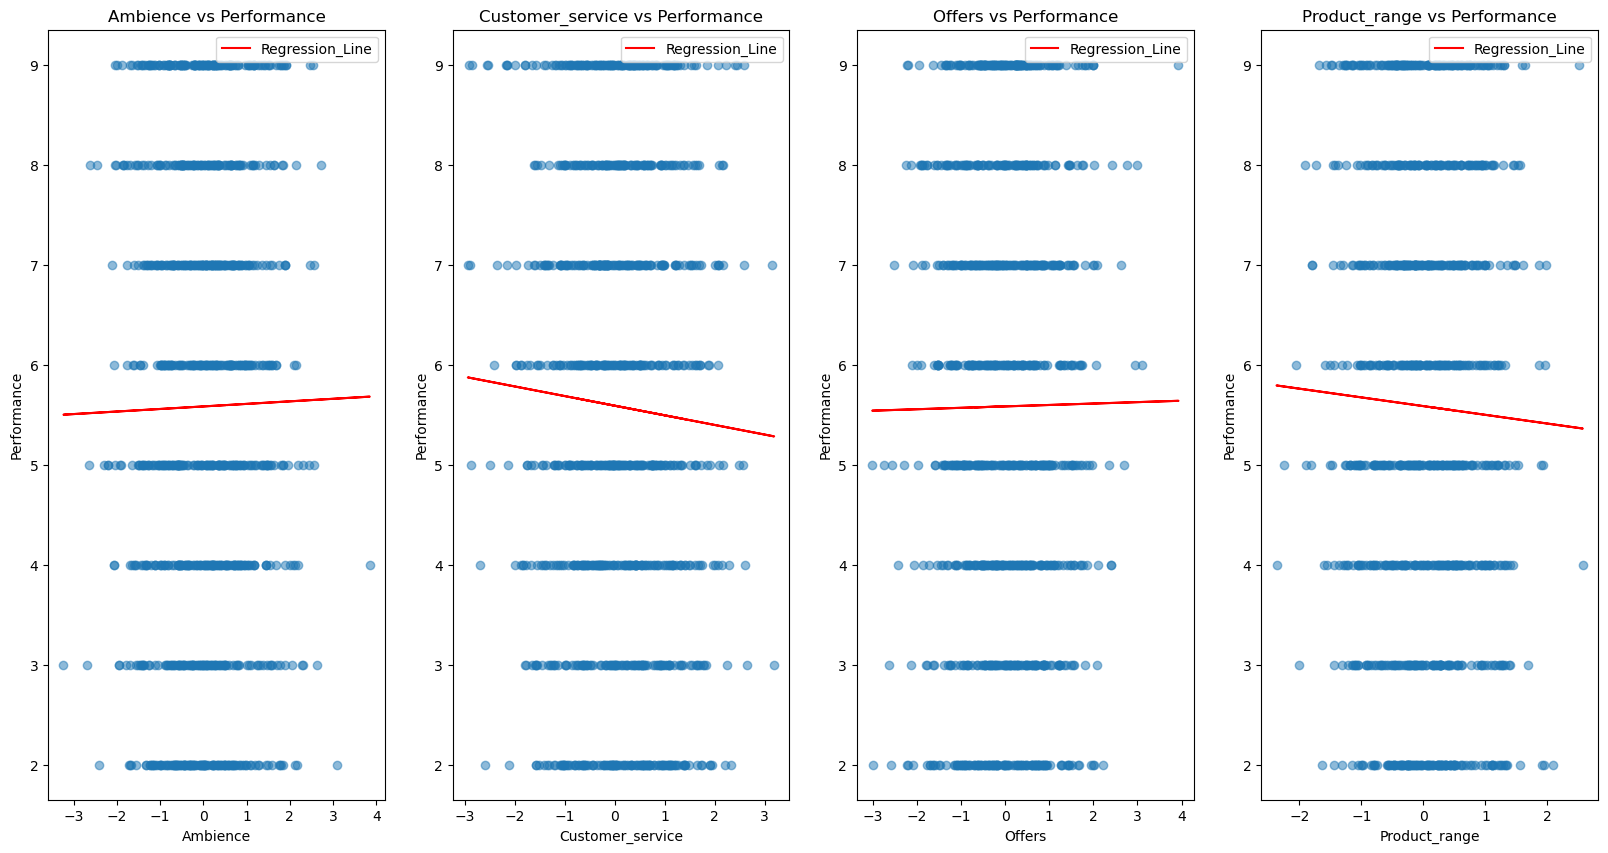

In [34]:
fig , ax = plt.subplots(1,4, figsize=(20,10))

# Scatter plot for TV vs Sales
plot_scatter_with_regression(ax[0],df['Ambience'],df['Performance'],'Ambience','Performance','Ambience vs Performance')
plot_scatter_with_regression(ax[1],df['Customer_service'],df['Performance'],'Customer_service','Performance','Customer_service vs Performance')
plot_scatter_with_regression(ax[2],df['Offers'],df['Performance'],'Offers','Performance','Offers vs Performance')
plot_scatter_with_regression(ax[3],df['Product_range'],df['Performance'],'Product_range','Performance','Product_range vs Performance')
plt.tight_layout
plt.show()